In [1]:

import numpy as np
import matplotlib.pyplot as plt

def make_NMR_chart(range_max, N, peaktops):
    """
    Generate an NMR (Nuclear Magnetic Resonance) chart.

    Parameters:
    - range_max (float): The maximum range of the NMR chart.
    - N (int): The number of data points in the NMR chart.
    - peaktops (list): A list of peak frequencies for the NMR chart.

    Returns:
    - freq (ndarray): The frequency values of the NMR chart.
    - signal_positive (ndarray): The positive part of the NMR signal.

    """
    mesuring_time = N / range_max / 2
    t = np.linspace(0, mesuring_time, N, endpoint=False)
    signal = np.zeros(N)
    
    for peak in peaktops:
        signal += np.cos(2 * np.pi * peak * t)
    signal *= np.exp(-0.4 * t) 
    
    # Add Gaussian noise (noise intensity is specified by the second argument)
    signal += np.random.normal(0, 0.01, N)
    
    signal_positive = np.real(np.fft.fft(signal))[:N//2]
    freq = np.fft.fftfreq(N, 1 / range_max / 2)[:N//2]
    
    return freq, signal_positive - np.min(signal_positive) / np.max(signal_positive)


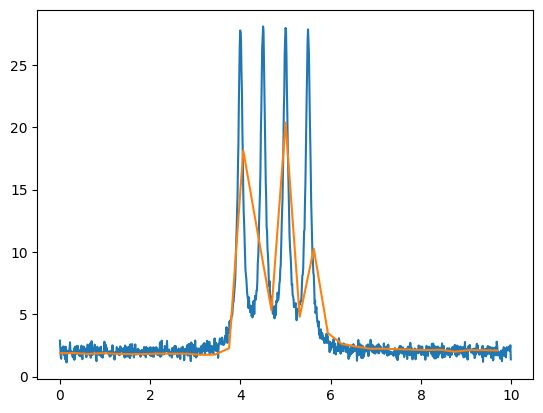

In [2]:
#FFT
peaktops = np.array([4,4.5,5,5.5])
x1,y1 = make_NMR_chart(10 ,2048, peaktops)
x2,y2 = make_NMR_chart(10 ,  64, peaktops)

#plot
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, FloatLogSlider


def make_NMR_chart(range_max, N, peaktops):
    """
    Generate an NMR (Nuclear Magnetic Resonance) chart.

    Parameters:
    - range_max (float): The maximum range of the NMR chart.
    - N (int): The number of data points in the NMR chart.
    - peaktops (list): A list of peak frequencies for the NMR chart.

    Returns:
    - freq (ndarray): The frequency values of the NMR chart.
    - signal_positive (ndarray): The positive part of the NMR signal.

    """
    mesuring_time = N / range_max / 2
    t = np.linspace(0, mesuring_time, N, endpoint=False)
    signal = np.zeros(N)
    
    for peak in peaktops:
        signal += np.cos(2 * np.pi * peak * t)
    signal *= np.exp(-0.4 * t) 
    
    # Add Gaussian noise (noise intensity is specified by the second argument)
    signal += np.random.normal(0, 0.01, N)
    
    signal_positive = np.real(np.fft.fft(signal))[:N//2]
    freq = np.fft.fftfreq(N, 1 / range_max / 2)[:N//2]
    
    return freq, signal_positive - np.min(signal_positive) / np.max(signal_positive)

def plot_NMR_chart( N, peakshift, J1, J2):
    N = int(N)
    peaktops = np.array([(-J1-J2)/2,(-J1+J2)/2,(J1-J2)/2,(J1+J2)/2] ) + peakshift
    x, y = make_NMR_chart(10, N, peaktops)
    plt.plot(x, y)
    plt.show()

interact(plot_NMR_chart,
        N=FloatLogSlider(value=2048, min=5, max=14, base = 2, step=1),
        peakshift=FloatSlider(value=5, min=4, max=6, step=0.1),
        J1=FloatSlider(value=0, min=0, max=2, step=0.01),
        J2=FloatSlider(value=0, min=0, max=2, step=0.01),)






interactive(children=(FloatLogSlider(value=2048.0, base=2.0, description='N', max=14.0, min=5.0, step=1.0), Fl…

<function __main__.plot_NMR_chart(N, peakshift, J1, J2)>

In [ ]:
!pip install ipywidgets 